<h1><center>Shopify Data Science Intern Challenge</center></h1>

In [43]:
# Import required packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Read data and calculate AOV

df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")
order_amount_mean = df["order_amount"].mean()
print("AOV: " + str(order_amount_mean))

AOV: 3145.128


#### Here the AOV value is coming out to be too high possibly because of outliers. <br>
#### Hence, let us do some outlier detection!

## Outlier Detection

<AxesSubplot:xlabel='order_amount', ylabel='Density'>

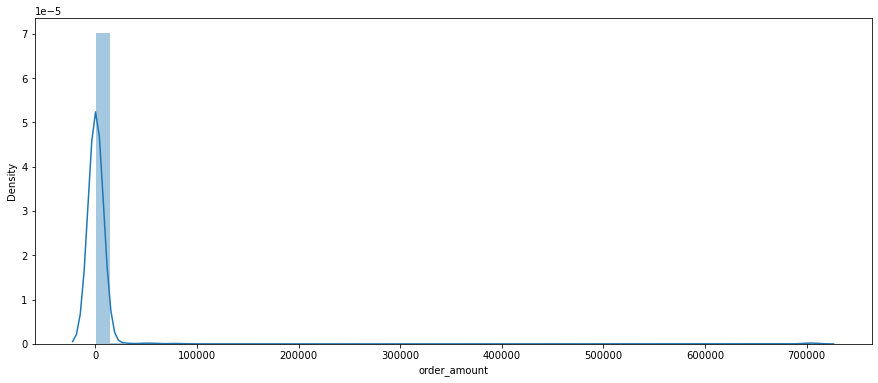

In [45]:
f,ax = plt.subplots(figsize = (15,6))
sns.distplot(df.order_amount)

#### The above plot shows right skewness to it, which confirms the presence of outliers.

<AxesSubplot:xlabel='order_amount'>

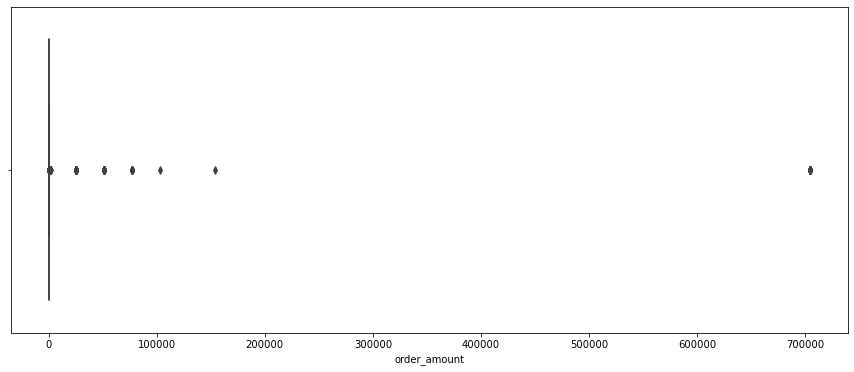

In [50]:
f,ax = plt.subplots(figsize = (15,6))
sns.boxplot(df.order_amount)

#### Above boxplot also confirms the presence of outliers at the higher end.

## Outlier Removal

#### Here, Interquartile Range analysis is being used to remove outliers.

In [48]:
data = sorted(df.order_amount)
Q1, Q3 = np.percentile(data , [25,75])
IQR = Q3 - Q1
upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

df_cleaned = df[(df.order_amount > lower_limit) & (df.order_amount < upper_limit)]

In [49]:
# Mean calculation on cleaned data

order_amount_mean = df_cleaned["order_amount"].mean()
print("AOV after outlier removal: " + str(order_amount_mean))

AOV after outlier removal: 293.7153735336489
